# Predicting autism using behavioural data : Exploratory Data Analysis

## 1) Background on autism:

#### What is autism:
Autism spectrum disorder (ASD) is a developmental disorder that affects communication and behavior. Although autism can be diagnosed at any age, it is said to be a “developmental disorder” because symptoms generally appear in the first two years of life. 
Autism is known as a “spectrum” disorder because there is wide variation in the type and severity of symptoms people experience. ASD occurs in all ethnic, racial, and economic groups. Although ASD can be a lifelong disorder, treatments and services can improve a person’s symptoms and ability to function. The American Academy of Pediatrics recommends that all children be screened for autism. 

People with ASD have difficulty with social communication and interaction, restricted interests, and repetitive behaviors. 
Doctors diagnose ASD by looking at a person’s behavior and development. ASD can usually be reliably diagnosed by the age of two. It is important for those with concerns to seek out assessment as soon as possible so that a diagnosis can be made, and treatment can begin. <br>
https://www.nimh.nih.gov/health/topics/autism-spectrum-disorders-asd/index.shtml

## The problem:
Previously considered rare, ASD is now recognized to occur in more than 1% of children. Despite continuing research advances, their pace and clinical impact have not kept up with the urgency to identify ways of determining the diagnosis at earlier ages, selecting optimal treatments, and predicting outcomes. For the most part this is due to the complexity and heterogeneity of ASD. To face these challenges, large-scale samples are essential, but single laboratories cannot obtain sufficiently large datasets to reveal the brain mechanisms underlying ASD. This is why the ABIDE dataset was created, to allow all people in science to try out advancing on this difficult topic.

#### What this notebook aims to do:
The American Academy of Pediatrics recommends that all children be screened for autism. With all those results, interpretation and correct identification of ASD children could be a problem. I think that machine learning could help ease the work of medical professionals and allow them to have reliable trained models that can give indications on the diagnostic of children. For this project I would like to implement different classification models in machine learning to detect and identify ASD children based on their behavioural data.
http://fcon_1000.projects.nitrc.org/indi/abide/


## 2 ) The behavioural data: ABIDE2 dataset

ABIDE II was established to further promote discovery science on the brain connectome in ASD. To date, ABIDE II has aggregated over 1000 additional datasets with greater phenotypic characterization, particularly in regard to measures of core ASD and associated symptoms. To date, ABIDE II involves 19 sites - ten charter institutions and seven new members - overall donating 1114 datasets from 521 individuals with ASD and 593 controls (age range: 5-64 years). These data have been openly released to the scientific community on June 2016.
http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html

The behavioural data are composed of several psychological tests filled by the child and/or by the parents about the child’s development, including language, movement, thinking, behaviour, and emotions. They are the main instrument to screen children and determine if they are signs of ASD for further evaluation.
Some example of tests:
* SRS - Social Responsiveness Scale : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3504640/
* BRIEF TEST - Behavior Rating Inventory of Executive Function : https://link.springer.com/referenceworkentry/10.1007%2F978-3-319-57111-9_1881

All the data in the dataset comes from multiples laboratories around the world sharing their data, which implies two things:

* The dataset is mostly clean, it has very little incorrect values
* The dataset is very heterogeneous, as all the laboratories used different screening/psychological tests to measure ASD.


## 3) Exploratory Data Analysis

### Work process: 

* Clean the dataset (NaN/outliers)
* Explore the data and the features
* Select relevant features and engineer new ones
* Create new dataset based on the selected features to start the models

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [108]:
abide2 = pd.read_csv('ABIDEII_Composite_Phenotypic.csv', encoding = 'unicode_escape')

In [109]:
abide2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Columns: 348 entries, SITE_ID to ADI_R_D_INTERVIEWER_JUDGMENT
dtypes: float64(337), int64(3), object(8)
memory usage: 3.0+ MB


In [110]:
abide2.shape

(1114, 348)

### Clean the data

I am gonne start by removing all the columns with more than 80% of NaN since i wont't be able to use them.

In [111]:
na_80 = abide2.isnull().sum()/ len(abide2)

# taking all columns with more than 80% of missing data 
missing_data = na_80[na_80 > 0.80].index

abide2.drop(missing_data, axis=1, inplace=True)

In [112]:
abide2.shape

(1114, 101)

In [113]:
pd.set_option('display.max_rows', 110) # Can see all of my rows
abide2.isnull().sum().sort_values()

SITE_ID                            0
SUB_ID                             0
DX_GROUP                           0
AGE_AT_SCAN                        0
SEX                                0
EYE_STATUS_AT_SCAN                 1
HANDEDNESS_CATEGORY               23
FIQ_TEST_TYPE                     99
FIQ                               99
CURRENT_MED_STATUS               123
CURRENT_MEDICATION_NAME          124
PIQ                              242
PIQ_TEST_TYPE                    242
VIQ                              315
VIQ_TEST_TYPE                    315
SRS_MANNERISMS_RAW               329
SRS_MOTIVATION_RAW               329
SRS_COMMUNICATION_RAW            329
SRS_TOTAL_RAW                    329
SRS_INFORMANT                    329
SRS_VERSION                      329
SRS_EDITION                      329
SRS_COGNITION_RAW                357
SRS_AWARENESS_RAW                357
SRS_TOTAL_T                      358
SRS_MANNERISMS_T                 365
SRS_COMMUNICATION_T              365
S

I am gonne explore the number of ASD children and the age of my participants.

In [114]:
# Small mistake here in the dataset, the Age at scan has a space after it.

abide2['AGE'] = abide2['AGE_AT_SCAN ']
abide2.drop('AGE_AT_SCAN ', axis=1, inplace=True)

Number of missing value in target: 0



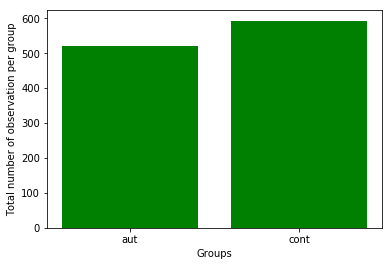

Number of control in the dataset: 593
Number of asd in the dataset: 521
Total of participants in the dataset: 1114


In [115]:
# Plot groups c/asd

print('Number of missing value in target:', abide2['DX_GROUP'].isnull().sum())
print()

groups = ['ASD', 'CONTROL']
height = [(abide2['DX_GROUP']==1).sum(), (abide2['DX_GROUP']==2).sum()]

plt.bar(groups, height, color='g')


plt.xticks([0,1], ['aut', 'cont'])
plt.xlabel('Groups')
plt.ylabel('Total number of observation per group')

plt.show()

n_asd = (abide2['DX_GROUP']==1).sum()
n_c = (abide2['DX_GROUP']==2).sum()

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)

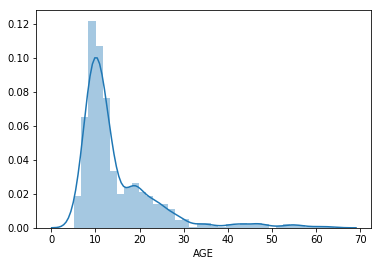

In [116]:
# Age distribution in the dataset

sns.distplot(abide2['AGE']);

In [117]:
# Checking for biais based on the location of the recolted data

abide2['SITE_ID'].unique()

array(['ABIDEII-BNI_1', 'ABIDEII-EMC_1', 'ABIDEII-ETH_1', 'ABIDEII-GU_1',
       'ABIDEII-IP_1', 'ABIDEII-IU_1', 'ABIDEII-KKI_1', 'ABIDEII-KUL_3',
       'ABIDEII-NYU_1', 'ABIDEII-NYU_2', 'ABIDEII-OHSU_1',
       'ABIDEII-OILH_2', 'ABIDEII-SDSU_1', 'ABIDEII-SU_2',
       'ABIDEII-TCD_1', 'ABIDEII-UCD_1', 'ABIDEII-UCLA_1',
       'ABIDEII-U_MIA_1', 'ABIDEII-USM_1'], dtype=object)

In [118]:
list_site_asd = []
list_site_control = []

for groups in abide2.SITE_ID.unique():
    
    subset = abide2[(abide2['SITE_ID'] == groups)]

    n_asd = (subset['DX_GROUP']==1).sum()
    n_c = (subset['DX_GROUP']==2).sum()
    
    list_site_asd.append(n_asd)
    list_site_control.append(n_c)

    
print('list of ASD patients with regards to the sites:', list_site_asd)
print('list of control patients with regards to the sites:', list_site_control) 

list of ASD patients with regards to the sites: [29, 27, 13, 51, 22, 20, 56, 28, 48, 27, 37, 24, 33, 21, 21, 18, 16, 13, 17]
list of control patients with regards to the sites: [29, 27, 24, 55, 34, 20, 155, 0, 30, 0, 56, 35, 25, 21, 21, 14, 16, 15, 16]


In [119]:
# Get the clean name of the different sites

list_sites = [i for i in abide2['SITE_ID'].unique()]

serie = pd.Series(list_sites)
sites = serie.str.replace('ABIDEII-', '');

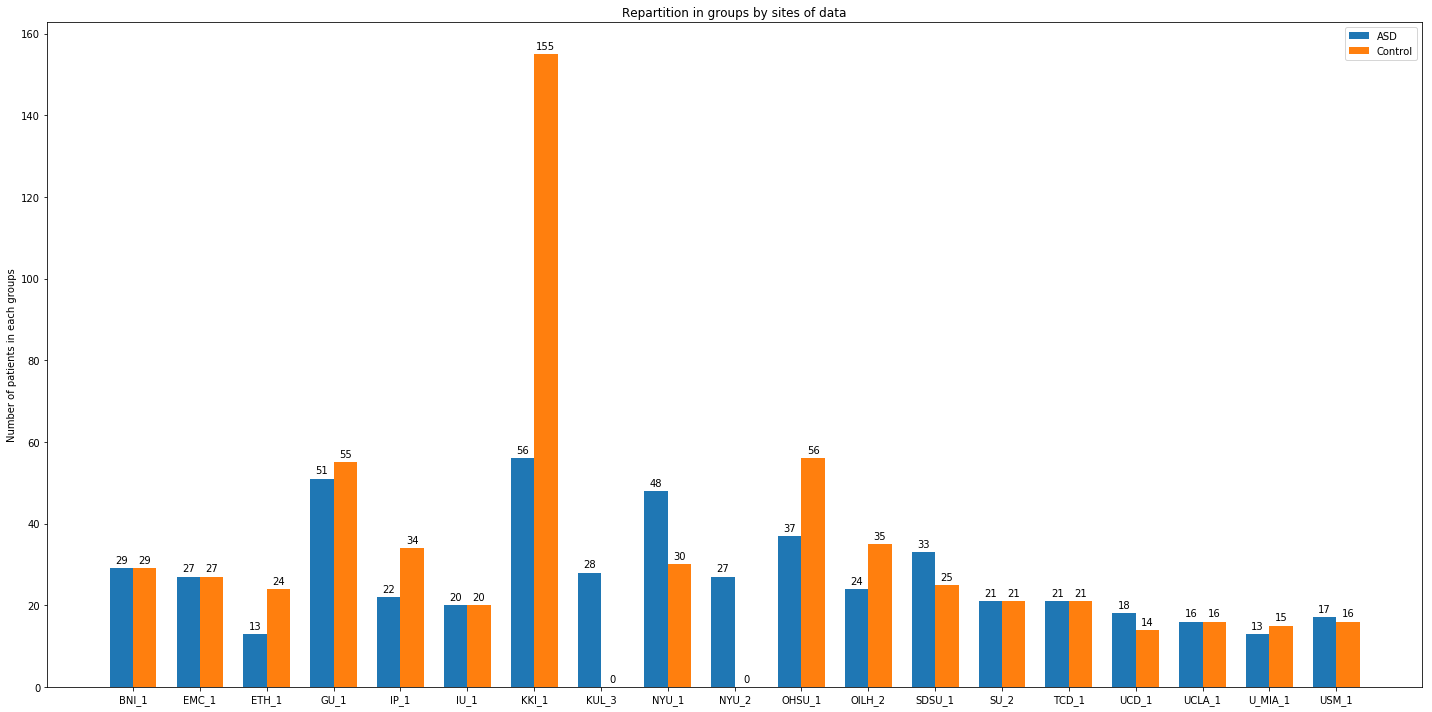

In [120]:
# Create the plot

x = np.arange(len(sites))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width/2, list_site_asd, width, label='ASD')
rects2 = ax.bar(x + width/2, list_site_control, width, label='Control')

ax.set_ylabel('Number of patients in each groups')
ax.set_title('Repartition in groups by sites of data')
ax.set_xticks(x)
ax.set_xticklabels(sites)
ax.legend()

# Code from matplotlib example of barchar annotation
def labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


labels(rects1)
labels(rects2)


fig.tight_layout()

plt.show()

I can see some of the studies do not provide a equivalent ratio of ASD and control patients. Some (KUL/NYU) don't provide any control at all, while KKI provides way more controls. <br>
I will need to be careful when making the sub datasets to have a good ratio in my target.

## Checking for outliers 

In [121]:
pd.set_option('display.max_columns', 110)
abide2.describe()

,SUB_ID,DX_GROUP,PDD_DSM_IV_TR,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ADI_R_NONVERBAL_TOTAL_BV,ADI_R_RRB_TOTAL_C,ADI_R_ONSET_TOTAL_D,ADI_R_RSRCH_RELIABLE,ADOS_MODULE,ADOS_RSRCH_RELIABLE,ADOS_G_TOTAL,ADOS_G_COMM,ADOS_G_SOCIAL,ADOS_G_STEREO_BEHAV,ADOS_2_SOCAFFECT,ADOS_2_RRB,ADOS_2_TOTAL,ADOS_2_SEVERITY_TOTAL,SRS_EDITION,SRS_VERSION,SRS_INFORMANT,SRS_TOTAL_RAW,SRS_AWARENESS_RAW,SRS_COGNITION_RAW,SRS_COMMUNICATION_RAW,SRS_MOTIVATION_RAW,SRS_MANNERISMS_RAW,SRS_TOTAL_T,SRS_AWARENESS_T,SRS_COGNITION_T,SRS_COMMUNICATION_T,SRS_MOTIVATION_T,SRS_MANNERISMS_T,SCQ_VERSION,SCQ_TOTAL,CURRENT_MED_STATUS,EYE_STATUS_AT_SCAN,RBSR_6SUBSCALE_STEREOTYPED,RBSR_6SUBSCALE_SELF-INJURIOUS,RBSR_6SUBSCALE_COMPULSIVE,RBSR_6SUBSCALE_RITUALISTIC,RBSR_6SUBSCALE_SAMENESS,RBSR_6SUBSCALE_RESTRICTED,RBSR_6SUBSCALE_TOTAL,RBSR_5SUBSCALE_STEREOTYPIC,RBSR_5SUBSCALE_SELF-INJURIOUS,RBSR_5SUBSCALE_COMPULSIVE,RBSR_5SUBSCALE_RITUALISTIC,RBSR_5SUBSCALE_RESTRICTED,RBSR_5SUBSCALE_TOTAL,BRIEF_VERSION,BRIEF_INFORMANT,BRIEF_INHIBIT_T,BRIEF_SHIFT_T,BRIEF_EMOTIONAL_T,BRIEF_BRI_T,BRIEF_INITIATE_T,BRIEF_WORKING_T,BRIEF_PLAN_T,BRIEF_ORGANIZATION_T,BRIEF_MONITOR_T,BRIEF_MI_T,BRIEF_GEC_T,BRIEF_INCONSISTENCY_SCORE,BRIEF_NEGATIVITY_SCORE,CBCL_6-18_ACTIVITIES_T,CBCL_6-18_SOCIAL_T,CBCL_6-18_SCHOOL_T,CBCL_6-18_ANXIOUS_T,CBCL_6-18_WITHDRAWN_T,CBCL_6-18_SOMATIC_COMPAINT_T,CBCL_6-18_SOCIAL_PROBLEM_T,CBCL_6-18_THOUGHT_T,CBCL_6-18_ATTENTION_T,CBCL_6-18_RULE_T,CBCL_6-18_AGGRESSIVE_T,CBCL_6-18_INTERNAL_T,CBCL_6-18_EXTERNAL_T,CBCL_6-18_TOTAL_PROBLEM_T,CBCL_6-18_AFFECTIVE_T,CBCL_6-18_ANXIETY_T,CBCL_6-18_SOMATIC_PROBLEM_T,CBCL_6-18_ATTENTION_DEFICIT_T,CBCL_6-18_OPPOSITIONAL_T,CBCL_6-18_CONDUCT_T,AGE
count,1114.000000,1114.000000,595.000000,1114.000000,1091.000000,641.000000,1015.000000,799.000000,872.000000,302.000000,301.000000,261.000000,302.000000,302.000000,302.000000,535.000000,535.000000,347.000000,347.000000,347.000000,347.000000,269.000000,269.000000,269.000000,264.000000,785.000000,785.000000,785.000000,785.000000,757.000000,757.000000,785.000000,785.000000,785.000000,756.000000,728.000000,728.000000,749.000000,749.000000,749.000000,294.000000,293.000000,991.000000,1113.000000,452.000000,452.000000,451.000000,451.000000,452.000000,452.000000,451.000000,262.000000,262.000000,261.000000,261.000000,262.000000,261.000000,487.0,416.000000,487.000000,487.000000,486.000000,486.000000,487.000000,487.000000,485.000000,487.000000,486.000000,485.000000,484.000000,430.000000,430.000000,276.000000,271.000000,274.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.00000,401.000000,400.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,1114.000000
mean,29329.824057,1.532316,0.843697,1.231598,1.183318,70.937499,111.023645,112.143930,108.342890,18.894040,15.089701,8.524904,5.705298,2.947020,0.890728,3.371963,0.938318,9.536023,3.017291,6.345821,1.397695,9.315985,3.029740,12.345725,6.992424,1.419108,1.200000,4.416561,55.275159,8.006605,9.527081,18.239490,9.463694,9.864968,59.358466,56.373626,56.840659,58.372497,57.578104,60.510013,1.445578,10.839590,0.168517,1.117700,2.013274,1.042035,2.206208,2.742794,4.238938,1.869469,14.095344,3.576336,1.316794,2.390805,6.352490,2.549618,16.191571,1.0,6.987981,52.958932,55.281314,51.886831,53.563786,54.295688,54.926078,54.230928,52.919918,52.946502,54.558763,54.429752,2.865116,1.048837,47.710145,46.538745,47.762774,56.693267,57.715711,55.635910,57.503741,58.379052,58.625935,53.366584,54.748130,53.74813,49.022444,52.047500,56.147482,55.784173,54.640288,55.942446,54.600719,53.082734,14.864374
std,429.595310,0.499179,1.063999,0.422043,0.520529,43.101969,15.482364,16.415442,15.989322,5.925509,4.714014,3.435722,2.481005,1.360516,0.312497,0.542189,0.240803,4.723664,1.708442,3.322937,1.427555,3.694561,1.744674,4.219203,1.928360,0.493728,0.400255,3.173307,42.868608,5.051189,8.323859,15.090331,7.448909,9.331323,18.818473,16.068473,17.350165,18.144071,16.152

Outliers: I have the minimum and maximum value of each variale in the data legend (http://fcon_1000.projects.nitrc.org/indi/abide/ABIDEII_Data_Legend.pdf). <br>
Looking at the data description is going to be long, I am going to create a DataFrame with the minimum and maximum of each variable to check for outliers. I will also plot each variables to look if everything is in order.

### Create a DataFrame with Min and Max

In [122]:
plot_out = abide2.select_dtypes(['float64', 'int64']).copy()
plot_out.drop(['PDD_DSM_IV_TR', 'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'EYE_STATUS_AT_SCAN', 'SRS_EDITION', 'SRS_VERSION', 'SCQ_VERSION', 'CURRENT_MED_STATUS',
              'BRIEF_VERSION', 'SUB_ID'], axis=1, inplace=True)

In [123]:
list_min = []
list_max = []
list_col = []

for col in plot_out.columns:
    
    list_col.append(col)
    # get the min 
    val_min = plot_out[col].idxmin()
    val_min = plot_out.loc[val_min, col]
    list_min.append(val_min)
    # get the max
    val_max = plot_out[col].idxmax()
    val_max = plot_out.loc[val_max, col]
    list_max.append(val_max)

In [124]:
data_boundaries = pd.DataFrame(index=list_col, data={'minimum':list_min, 'maximum':list_max})

In [125]:
data_boundaries

,minimum,maximum
DX_GROUP,1.000,2.0
SEX,1.000,2.0
FIQ,49.000,151.0
VIQ,45.000,156.0
PIQ,53.000,149.0
ADI_R_SOCIAL_TOTAL_A,0.000,30.0
ADI_R_VERBAL_TOTAL_BV,0.000,25.0
ADI_R_NONVERBAL_TOTAL_BV,0.000,14.0
ADI_R_RRB_TOTAL_C,0.000,12.0
ADI_R_ONSET_TOTAL_D,0.000,5.0


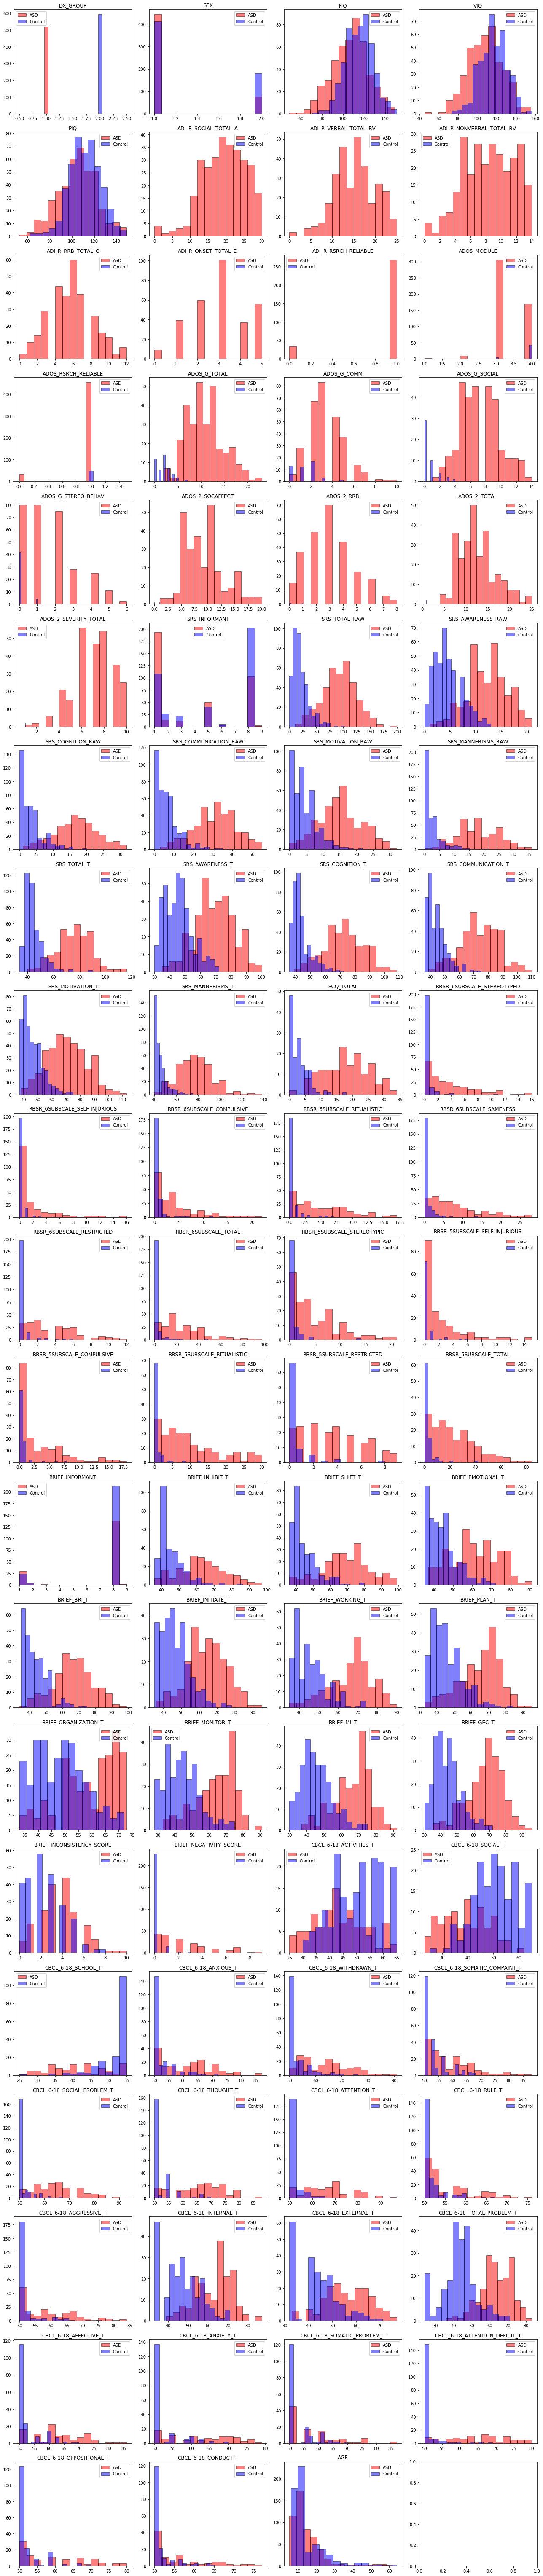

In [126]:
fig,axes = plt.subplots(nrows=21,ncols=4,figsize=(18,17*5))

for col, ax in zip(plot_out.columns, axes.ravel()):
    
    clean_col = plot_out.dropna(subset=[col])
    
    asd= clean_col[(clean_col['DX_GROUP'] == 1)]
    contr = clean_col[(clean_col['DX_GROUP'] == 2)]

    ax.hist(asd[col], bins=15, color='r', edgecolor='black', alpha=0.5, label='ASD')
    ax.hist(contr[col], bins=15, color='b', edgecolor='black', alpha=0.5, label='Control')
    
    ax.legend()
    ax.set_title(col)

plt.tight_layout()

After checking both the DataFrame and the histograms I can see that they is no outliers. 

### Features

I can see that most of the columns refer to psychological tests that the child/parents did. The rest are demographic data such as AGE/SEX or technical data taken during the MRI scan (EYE_STATUS_AT_SCAN).

In the outliers plotting I can see that in most of the tests, the two groups have differents results and since all data comes from relevant researches on Autism, all features should be relevant to classify ASD symptoms, to check that I am gonne plot a correlation matrix. 

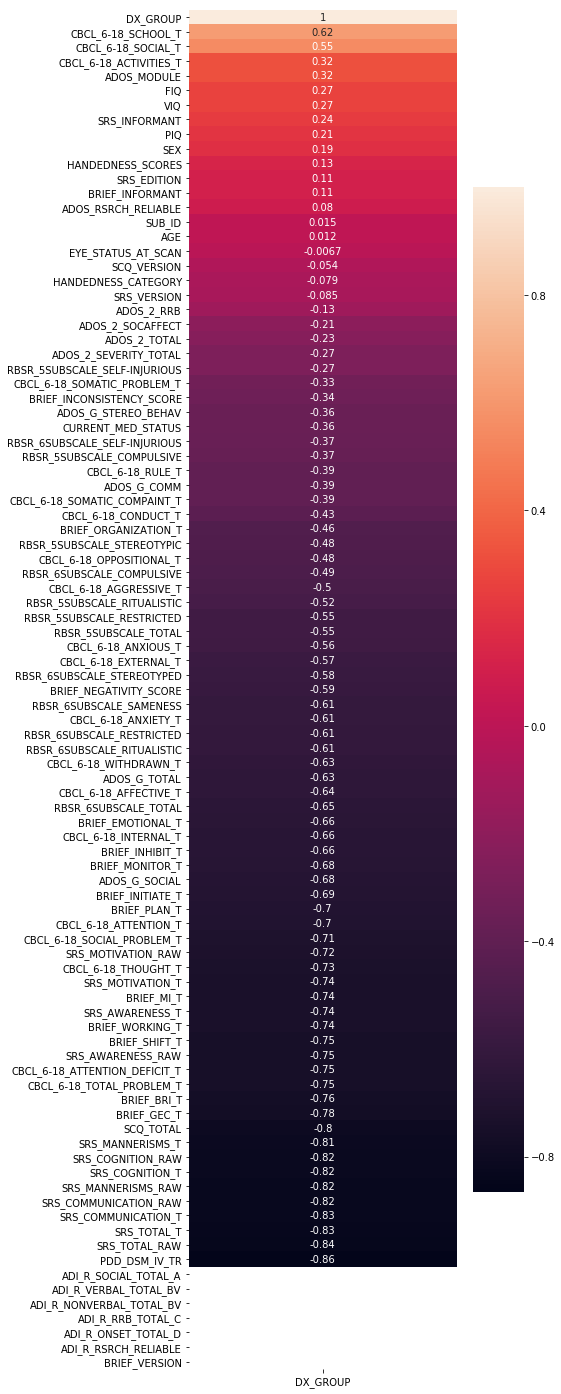

In [127]:
# First look at the correlation 

cont_col = abide2.select_dtypes(include=['float64', 'int64'])

correlations = cont_col.corr()['DX_GROUP']

plt.figure(figsize=(6, 30))
sns.heatmap(correlations.to_frame().sort_values('DX_GROUP', ascending=False), annot=True)
plt.show()


Each test is different (http://fcon_1000.projects.nitrc.org/indi/abide/ABIDEII_Data_Legend.pdf) and explains one side of ASD symptoms. It makes those features really hard to combine in a relevant way. <br>
I can see that all the tests and their features are well correlated, I am gonne try to keep the maximum features based on the ratio of number of features and number of observation since I know theses tests have each ones a lot of NaN. I know that classification models do not suffer from collinearity, I am gonne keep the maximum features and apply a PCA model to reduce the dimensionnality of the data. <br>
To select the best ratio I am gonne plot each test with the number of Nan contained in it and see if it clarifies my problem.

# Plot all possible tests

In [128]:
# Create PCA to plot the differents tests

# 1. create small datasets with the diff tests

SRS = [x for x in abide2.columns if 'SRS' in x]
SRS_df = abide2.loc[:, SRS]
SRS_df['ASD'] = abide2['DX_GROUP']


BRIEF = [x for x in abide2.columns if 'BRIEF' in x]
BRIEF_df = abide2.loc[:, BRIEF]
BRIEF_df['ASD'] = abide2['DX_GROUP']


RBSR = [x for x in abide2.columns if 'RBSR_6SUBSCALE' in x]
RBSR_df = abide2.loc[:, RBSR]
RBSR_df['ASD'] = abide2['DX_GROUP']

CBCL = [x for x in abide2.columns if 'CBCL' in x]
CBCL_df = abide2.loc[:, CBCL]
CBCL_df['ASD'] = abide2['DX_GROUP']

ADOS_G = [x for x in abide2.columns if 'ADOS_G' in x]
ADOS_G_df = abide2.loc[:, ADOS_G]
ADOS_G_df['ASD'] = abide2['DX_GROUP']

ADI_R = [x for x in abide2.columns if 'ADI_R' in x]
ADI_R_df = abide2.loc[:, ADI_R]
ADI_R_df['ASD'] = abide2['DX_GROUP']

In [129]:
print('SRS data:', SRS_df.shape)
print('BRIEF data:', BRIEF_df.shape)
print('RBSR data:', RBSR_df.shape)
print('CBCL data:', CBCL_df.shape)
print('ADOS_G data:', ADOS_G_df.shape)
print('ADI_R data:', ADI_R_df.shape)

SRS data: (1114, 16)
BRIEF data: (1114, 16)
RBSR data: (1114, 8)
CBCL data: (1114, 21)
ADOS_G data: (1114, 5)
ADI_R data: (1114, 7)


## SRS data 

X shape: (728, 15)
y shape: (728,)


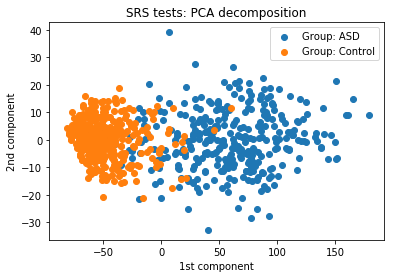

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clean SRS
SRS_df.dropna(inplace=True)

# Create X/y arrays
X = SRS_df.drop('ASD', axis=1).values
y = SRS_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X);


for groups in [1, 2]:
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='Group: {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')

plt.title('SRS tests: PCA decomposition')

plt.show()

X shape: (728, 15)
y shape: (728,)


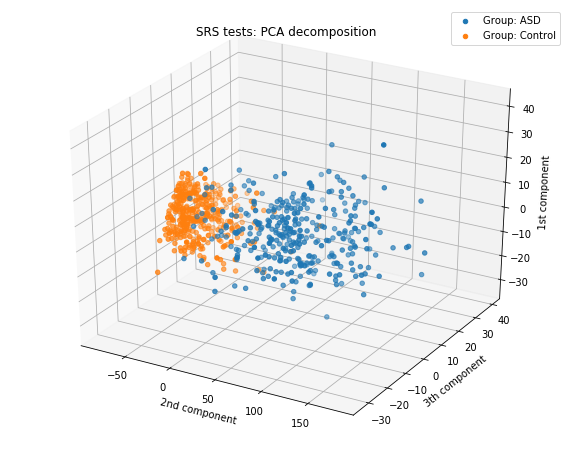

In [131]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Clean SRS
SRS_df.dropna(inplace=True)

# Create X/y arrays
X = SRS_df.drop('ASD', axis=1).values
y = SRS_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='Group: {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('SRS tests: PCA decomposition')
plt.show()

In [132]:
n_asd = len(SRS_df[(SRS_df['ASD'] == 1)])
n_c = len(SRS_df[(SRS_df['ASD'] == 2)])

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)
print('Ratio of ASD children in the dataset: {:.2f}'.format(n_asd/(n_c + n_asd)*100))

Number of control in the dataset: 396
Number of asd in the dataset: 332
Total of participants in the dataset: 728
Ratio of ASD children in the dataset: 45.60


### SRS test seems like an excellent candidate:
* it has a lot of observations 
* good ratio of control/asd
* large number of features (15)

## BRIEF data

X shape: (357, 15)
y shape: (357,)


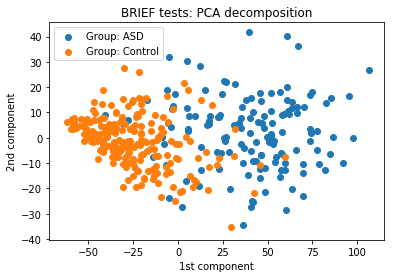

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clean SRS
BRIEF_df.dropna(inplace=True)

# Create X/y arrays
X = BRIEF_df.drop('ASD', axis=1).values
y = BRIEF_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X);


for groups in [1, 2]:
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='Group: {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('BRIEF tests: PCA decomposition')
plt.show()

X shape: (357, 15)
y shape: (357,)


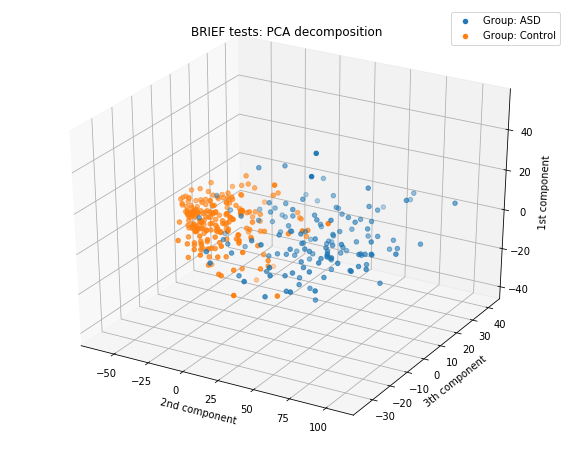

In [134]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Clean SRS
BRIEF_df.dropna(inplace=True)

# Create X/y arrays
X = BRIEF_df.drop('ASD', axis=1).values
y = BRIEF_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y == groups)

    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='Group: {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('BRIEF tests: PCA decomposition')
plt.show()

In [135]:
n_asd = len(BRIEF_df[(BRIEF_df['ASD'] == 1)])
n_c = len(BRIEF_df[(BRIEF_df['ASD'] == 2)])

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)
print('Ratio of ASD children in the dataset: {:.2f}'.format(n_asd/(n_c + n_asd)*100))

Number of control in the dataset: 218
Number of asd in the dataset: 139
Total of participants in the dataset: 357
Ratio of ASD children in the dataset: 38.94


### BRIEF test is also a good candidate:
* good number of observations 
* the ratio control/asd tends a bit to the control group but its ok
* lots of features

## RBSR data

X shape: (451, 7)
y shape: (451,)


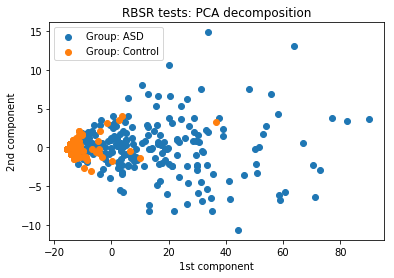

In [136]:
from sklearn.decomposition import PCA

# Clean SRS
RBSR_df.dropna(inplace=True)

# Create X/y arrays
X = RBSR_df.drop('ASD', axis=1).values
y = RBSR_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X);


for groups in [1, 2]:
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='Group: {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('RBSR tests: PCA decomposition')
plt.show()

X shape: (451, 7)
y shape: (451,)


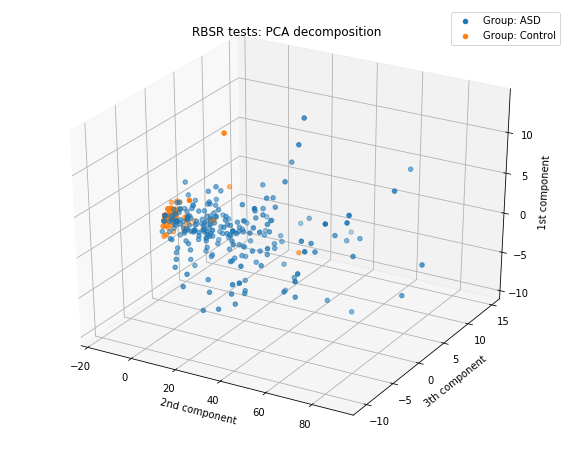

In [137]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Clean SRS
RBSR_df.dropna(inplace=True)

# Create X/y arrays
X = RBSR_df.drop('ASD', axis=1).values
y = RBSR_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='Group: {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('RBSR tests: PCA decomposition')

plt.show()

In [138]:
n_asd = len(RBSR_df[(RBSR_df['ASD'] == 1)])
n_c = len(RBSR_df[(RBSR_df['ASD'] == 2)])

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)
print('Ratio of ASD children in the dataset: {:.2f}'.format(n_asd/(n_c + n_asd)*100))

Number of control in the dataset: 223
Number of asd in the dataset: 228
Total of participants in the dataset: 451
Ratio of ASD children in the dataset: 50.55


### RBSR is a good candidate:
* lots of observations (best one after the SRS)
* excellent ratio of control/asd
* a smaller number of features (7 against 15 for the others)

## CBCL data

X shape: (267, 20)
y shape: (267,)


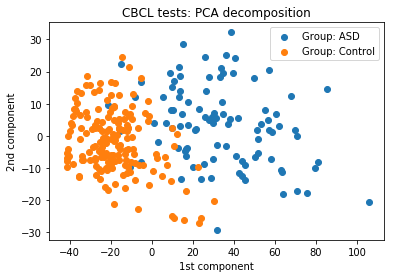

In [139]:
from sklearn.decomposition import PCA

# Clean SRS
CBCL_df.dropna(inplace=True)

# Create X/y arrays
X = CBCL_df.drop('ASD', axis=1).values
y = CBCL_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X);


for groups in [1, 2]:
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='Group: {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('CBCL tests: PCA decomposition')
plt.show()

X shape: (267, 20)
y shape: (267,)


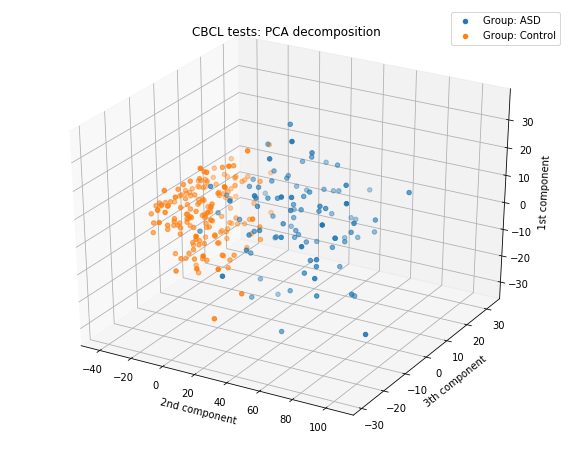

In [140]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Clean SRS
CBCL_df.dropna(inplace=True)

# Create X/y arrays
X = CBCL_df.drop('ASD', axis=1).values
y = CBCL_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='Group: {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('CBCL tests: PCA decomposition')

plt.show()

In [141]:
n_asd = len(CBCL_df[(CBCL_df['ASD'] == 1)])
n_c = len(CBCL_df[(CBCL_df['ASD'] == 2)])

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)
print('Ratio of ASD children in the dataset: {:.2f}'.format(n_asd/(n_c + n_asd)*100))

Number of control in the dataset: 171
Number of asd in the dataset: 96
Total of participants in the dataset: 267
Ratio of ASD children in the dataset: 35.96


### The CBCL is a medium candidate:
* The number of observation is a bit low
* The ration of control/asd clearly tends to the control
* On the other side, lots of features

## ADOS_G data

X shape: (347, 4)
y shape: (347,)


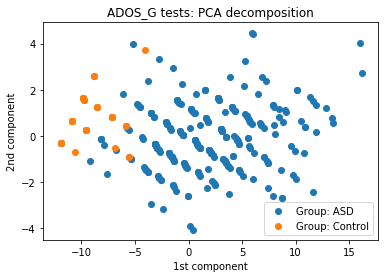

In [142]:
from sklearn.decomposition import PCA

# Clean SRS
ADOS_G_df.dropna(inplace=True)

# Create X/y arrays
X = ADOS_G_df.drop('ASD', axis=1).values
y = ADOS_G_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X);


for groups in [1, 2]:
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='Group: {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('ADOS_G tests: PCA decomposition')

plt.show()

X shape: (347, 4)
y shape: (347,)


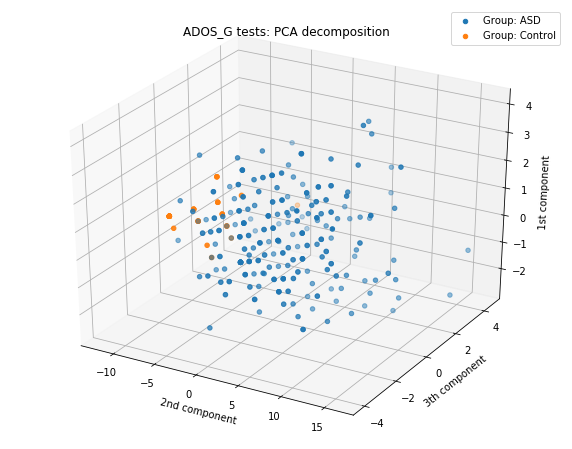

In [143]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Clean SRS
ADOS_G_df.dropna(inplace=True)

# Create X/y arrays
X = ADOS_G_df.drop('ASD', axis=1).values
y = ADOS_G_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='Group: {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('ADOS_G tests: PCA decomposition')

plt.show()

In [144]:
n_asd = len(ADOS_G_df[(ADOS_G_df['ASD'] == 1)])
n_c = len(ADOS_G_df[(ADOS_G_df['ASD'] == 2)])

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)
print('Ratio of ASD children in the dataset: {:.2f}'.format(n_asd/(n_c + n_asd)*100))

Number of control in the dataset: 46
Number of asd in the dataset: 301
Total of participants in the dataset: 347
Ratio of ASD children in the dataset: 86.74


### The ADOS test is rejected:
* The ratio of control/asd participants is too inequivalent
* too little features 

## ADI_R data

X shape: (260, 6)
y shape: (260,)


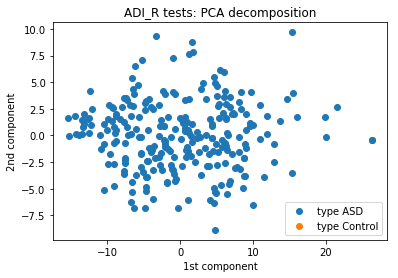

In [145]:
from sklearn.decomposition import PCA

# Clean SRS
ADI_R_df.dropna(inplace=True)

# Create X/y arrays
X = ADI_R_df.drop('ASD', axis=1).values
y = ADI_R_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X);


for groups in [1, 2]:
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('ADI_R tests: PCA decomposition')

plt.show()

X shape: (260, 6)
y shape: (260,)


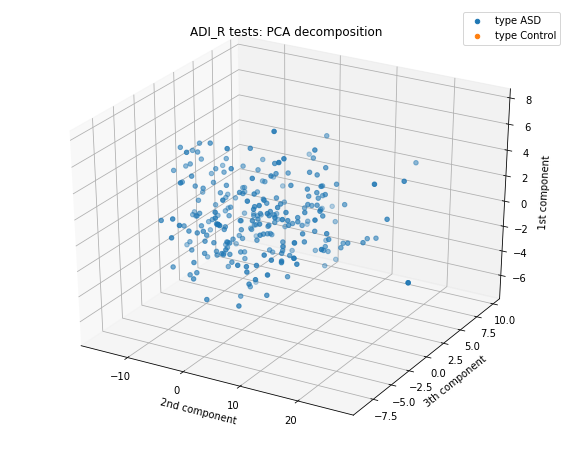

In [146]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Clean SRS
ADI_R_df.dropna(inplace=True)

# Create X/y arrays
X = ADI_R_df.drop('ASD', axis=1).values
y = ADI_R_df.ASD.values

print('X shape:', X.shape)
print('y shape:', y.shape)

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='type {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('ADI_R tests: PCA decomposition')

plt.show()

In [147]:
n_asd = len(ADI_R_df[(ADI_R_df['ASD'] == 1)])
n_c = len(ADI_R_df[(ADI_R_df['ASD'] == 2)])

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)

Number of control in the dataset: 0
Number of asd in the dataset: 260
Total of participants in the dataset: 260


### The ADI test is rejected:
* No control 
* little number of observations and features

## Test choosing 

This leaves us with 3 good candidates : 

* The SRS test with 728 observations, a good ratio and large number of features
* The BRIEF test with 357 observation, a good ratio and a large number of features
* The RBSR test with 451 observation, a excellent ratio and a smaller number of features

Now I still have to see if I can combine all of them or some of them to keep the maximum of observations!!

In [148]:
# Lets remove the other test 

RBSR_5 = [x for x in abide2.columns if 'RBSR_5SUBSCALE' in x]

col_to_drop = []
col_to_drop.append(RBSR_5)
col_to_drop.append(CBCL)
col_to_drop.append(ADOS_G)
col_to_drop.append(ADI_R)

# the list is two dim i need to make it 1D
flat_drop= []

for sublist in col_to_drop:
    for test in sublist:
        flat_drop.append(test)
    
flat_drop;
abide2.drop(flat_drop, axis=1, inplace=True)

In [149]:
abide2.isnull().sum().sort_values()

SITE_ID                            0
SEX                                0
DX_GROUP                           0
AGE                                0
SUB_ID                             0
EYE_STATUS_AT_SCAN                 1
HANDEDNESS_CATEGORY               23
FIQ                               99
FIQ_TEST_TYPE                     99
CURRENT_MED_STATUS               123
CURRENT_MEDICATION_NAME          124
PIQ                              242
PIQ_TEST_TYPE                    242
VIQ                              315
VIQ_TEST_TYPE                    315
SRS_TOTAL_RAW                    329
SRS_INFORMANT                    329
SRS_VERSION                      329
SRS_EDITION                      329
SRS_COMMUNICATION_RAW            329
SRS_MANNERISMS_RAW               329
SRS_MOTIVATION_RAW               329
SRS_COGNITION_RAW                357
SRS_AWARENESS_RAW                357
SRS_TOTAL_T                      358
SRS_MOTIVATION_T                 365
SRS_MANNERISMS_T                 365
S

In [150]:
# Start to clean the dataset with the SRS test
abide2_df1 = abide2.dropna(subset=['SRS_MANNERISMS_T', 'SRS_COGNITION_T', 'SRS_AWARENESS_T'])

In [151]:
abide2_df1.shape
abide2_df1.isnull().sum().sort_values()

SITE_ID                            0
SRS_MANNERISMS_T                   0
SRS_MOTIVATION_T                   0
SRS_COGNITION_T                    0
SRS_AWARENESS_T                    0
SRS_TOTAL_T                        0
SRS_MANNERISMS_RAW                 0
SRS_MOTIVATION_RAW                 0
SRS_COMMUNICATION_RAW              0
SRS_COGNITION_RAW                  0
SRS_AWARENESS_RAW                  0
SRS_TOTAL_RAW                      0
SRS_INFORMANT                      0
SRS_VERSION                        0
SRS_EDITION                        0
SRS_COMMUNICATION_T                0
AGE                                0
SUB_ID                             0
DX_GROUP                           0
SEX                                0
EYE_STATUS_AT_SCAN                 1
FIQ_TEST_TYPE                      7
FIQ                                7
HANDEDNESS_CATEGORY               15
CURRENT_MED_STATUS                39
CURRENT_MEDICATION_NAME           39
VIQ_TEST_TYPE                    143
V

I can see that the BRIEF and the RBSR tests have still around 270 and 370 NaN. The BRIEF test is the one with the less NA so lets clean it now.

In [152]:
abide2_df1 = abide2_df1.dropna(subset=['BRIEF_INHIBIT_T', 'BRIEF_EMOTIONAL_T', 'BRIEF_GEC_T'])
abide2_df1.shape

(448, 65)

In [153]:
abide2_df1.isnull().sum().sort_values()

SITE_ID                            0
SRS_COGNITION_RAW                  0
SRS_COMMUNICATION_RAW              0
SRS_MOTIVATION_RAW                 0
SRS_MANNERISMS_RAW                 0
SRS_TOTAL_T                        0
SRS_AWARENESS_T                    0
SRS_COGNITION_T                    0
SRS_MOTIVATION_T                   0
SRS_MANNERISMS_T                   0
SRS_AWARENESS_RAW                  0
BRIEF_VERSION                      0
BRIEF_SHIFT_T                      0
BRIEF_EMOTIONAL_T                  0
BRIEF_BRI_T                        0
BRIEF_INITIATE_T                   0
BRIEF_WORKING_T                    0
BRIEF_PLAN_T                       0
BRIEF_ORGANIZATION_T               0
BRIEF_MI_T                         0
BRIEF_GEC_T                        0
BRIEF_INHIBIT_T                    0
SRS_TOTAL_RAW                      0
SRS_COMMUNICATION_T                0
SRS_VERSION                        0
SUB_ID                             0
DX_GROUP                           0
S

I have 448 observations left.

* I can see that the BRIEF_MONITOR and the VIQ/FIQ tests are respectively 1 and 3 NaN values away from being cleaned. I am going to take them.

* I will not take the PIQ, the IQ tests were very little correlated with the target and the PIQ was the least correlated of them. I don’t want to lose observations over a supplementary – and potentially useless – feature. 

* The RBSR test I wanted has still 171 Nan values. I will create a separate dataset with the SRS and the RBSR.

* BRIEF NEGATIVITY & INCONSISTENCY still have 56 nan observations. I am choosing to drop those two features to have a bigger number of rows. 
 

In [154]:
abide2_df1 = abide2_df1.dropna(subset=['BRIEF_MONITOR_T', 'VIQ', 'FIQ'])
abide2_df1.shape

(444, 65)

In [155]:
abide2_df1.isnull().sum().sort_values()

SITE_ID                            0
SRS_COMMUNICATION_RAW              0
SRS_MOTIVATION_RAW                 0
SRS_MANNERISMS_RAW                 0
SRS_TOTAL_T                        0
SRS_AWARENESS_T                    0
SRS_COGNITION_T                    0
SRS_MOTIVATION_T                   0
SRS_MANNERISMS_T                   0
BRIEF_VERSION                      0
SRS_COGNITION_RAW                  0
BRIEF_INHIBIT_T                    0
BRIEF_EMOTIONAL_T                  0
BRIEF_BRI_T                        0
BRIEF_INITIATE_T                   0
BRIEF_WORKING_T                    0
BRIEF_PLAN_T                       0
BRIEF_ORGANIZATION_T               0
BRIEF_MONITOR_T                    0
BRIEF_MI_T                         0
BRIEF_GEC_T                        0
BRIEF_SHIFT_T                      0
SRS_AWARENESS_RAW                  0
SRS_COMMUNICATION_T                0
SRS_INFORMANT                      0
SUB_ID                             0
DX_GROUP                           0
S

I can see that the feature CURRENT_MED_STATUS is one missing values away, lets investigate if this could be relevant.

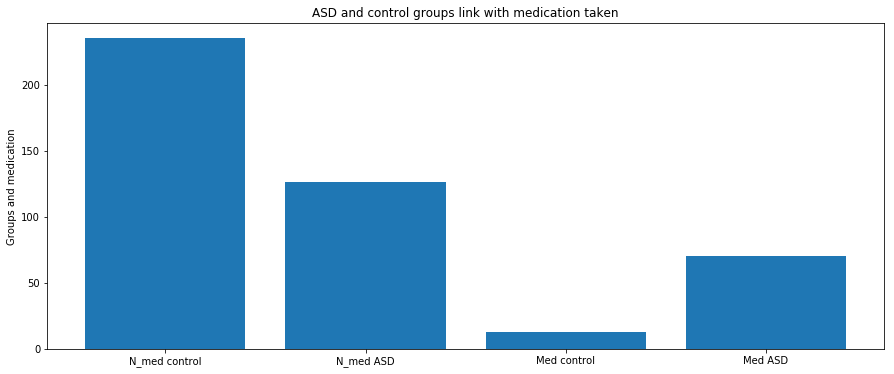

In [156]:
nomed_control = abide2_df1[(abide2_df1['CURRENT_MED_STATUS'] == 0) & (abide2_df1['DX_GROUP'] == 2)]
nomed_aut = abide2_df1[(abide2_df1['CURRENT_MED_STATUS'] == 0) & (abide2_df1['DX_GROUP'] == 1)]
med_control = abide2_df1[(abide2_df1['CURRENT_MED_STATUS'] != 0) & (abide2_df1['DX_GROUP'] == 2)]
med_aut = abide2_df1[(abide2_df1['CURRENT_MED_STATUS'] != 0) & (abide2_df1['DX_GROUP'] == 1)]

plt.figure(figsize=(15,6))
plt.bar([1,2,3,4], [len(nomed_control), len(nomed_aut), len(med_control), len(med_aut)])
plt.xticks([1,2,3,4], ['N_med control', 'N_med ASD', 'Med control', 'Med ASD'])

plt.ylabel('Groups and medication')
plt.title('ASD and control groups link with medication taken')


plt.show()

The number of control and ASD taking meds is very small, I am gonne remove it I don't think it can bring much value. 

In [157]:
# DROP THE REST OF THE COLUMNS WITH NAN

ASD_df1 = abide2_df1.dropna(axis=1).copy()
ASD_df1.shape

(444, 36)

In [158]:
ASD_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 149 to 904
Data columns (total 36 columns):
SITE_ID                  444 non-null object
SUB_ID                   444 non-null int64
DX_GROUP                 444 non-null int64
SEX                      444 non-null int64
FIQ                      444 non-null float64
VIQ                      444 non-null float64
FIQ_TEST_TYPE            444 non-null object
VIQ_TEST_TYPE            444 non-null object
SRS_EDITION              444 non-null float64
SRS_VERSION              444 non-null float64
SRS_INFORMANT            444 non-null float64
SRS_TOTAL_RAW            444 non-null float64
SRS_AWARENESS_RAW        444 non-null float64
SRS_COGNITION_RAW        444 non-null float64
SRS_COMMUNICATION_RAW    444 non-null float64
SRS_MOTIVATION_RAW       444 non-null float64
SRS_MANNERISMS_RAW       444 non-null float64
SRS_TOTAL_T              444 non-null float64
SRS_AWARENESS_T          444 non-null float64
SRS_COGNITION_T          444

I can get rid of other useless columns 

In [159]:
drop = ['SITE_ID', 'SUB_ID', 'SRS_EDITION', 'SRS_VERSION', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'BRIEF_VERSION']

ASD_df1.drop(drop, axis=1, inplace=True)

### ASD and SEX

After research it does seems that ASD is more present in the male population. So it make sense that the ratio be disproportionate as well as relevant to the data because women have statistically less chances to have it. I am gonne keep it.

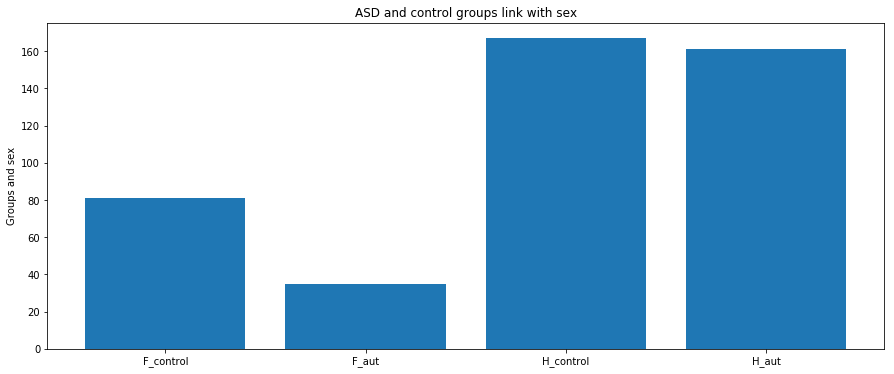

In [160]:
# I want to see if I should remove the column sex 
# 1 = Male, 2= female 

F_control = ASD_df1[(ASD_df1['SEX'] == 2) & (ASD_df1['DX_GROUP'] == 2)]
F_aut = ASD_df1[(ASD_df1['SEX'] == 2) & (ASD_df1['DX_GROUP'] == 1)]
H_control = ASD_df1[(ASD_df1['SEX'] == 1) & (ASD_df1['DX_GROUP'] == 2)]
H_aut = ASD_df1[(ASD_df1['SEX'] == 1) & (ASD_df1['DX_GROUP'] == 1)]

plt.figure(figsize=(15,6))
plt.bar([1,2,3,4], [len(F_control), len(F_aut), len(H_control), len(H_aut)])
plt.xticks([1,2,3,4], ['F_control', 'F_aut', 'H_control', 'H_aut'])

plt.ylabel('Groups and sex')
plt.title('ASD and control groups link with sex')


plt.show()

In [161]:
ASD_df1.info()

# top top

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 149 to 904
Data columns (total 29 columns):
DX_GROUP                 444 non-null int64
SEX                      444 non-null int64
FIQ                      444 non-null float64
VIQ                      444 non-null float64
SRS_INFORMANT            444 non-null float64
SRS_TOTAL_RAW            444 non-null float64
SRS_AWARENESS_RAW        444 non-null float64
SRS_COGNITION_RAW        444 non-null float64
SRS_COMMUNICATION_RAW    444 non-null float64
SRS_MOTIVATION_RAW       444 non-null float64
SRS_MANNERISMS_RAW       444 non-null float64
SRS_TOTAL_T              444 non-null float64
SRS_AWARENESS_T          444 non-null float64
SRS_COGNITION_T          444 non-null float64
SRS_COMMUNICATION_T      444 non-null float64
SRS_MOTIVATION_T         444 non-null float64
SRS_MANNERISMS_T         444 non-null float64
BRIEF_INHIBIT_T          444 non-null float64
BRIEF_SHIFT_T            444 non-null float64
BRIEF_EMOTIONAL_T      

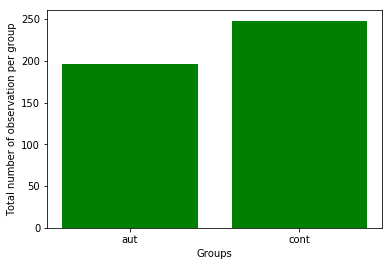

Number of control in the dataset: 248
Number of asd in the dataset: 196
Total of participants in the dataset: 444
Ratio of ASD children in the dataset: 44.14


In [162]:
groups = ['ASD', 'CONTROL']
height = [(ASD_df1['DX_GROUP']==1).sum(), (ASD_df1['DX_GROUP']==2).sum()]

plt.bar(groups, height, color='g')


plt.xticks([0,1], ['aut', 'cont'])
plt.xlabel('Groups')
plt.ylabel('Total number of observation per group')

plt.show()

n_asd = (ASD_df1['DX_GROUP']==1).sum()
n_c = (ASD_df1['DX_GROUP']==2).sum()

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)
print('Ratio of ASD children in the dataset: {:.2f}'.format(n_asd/(n_c + n_asd)*100))

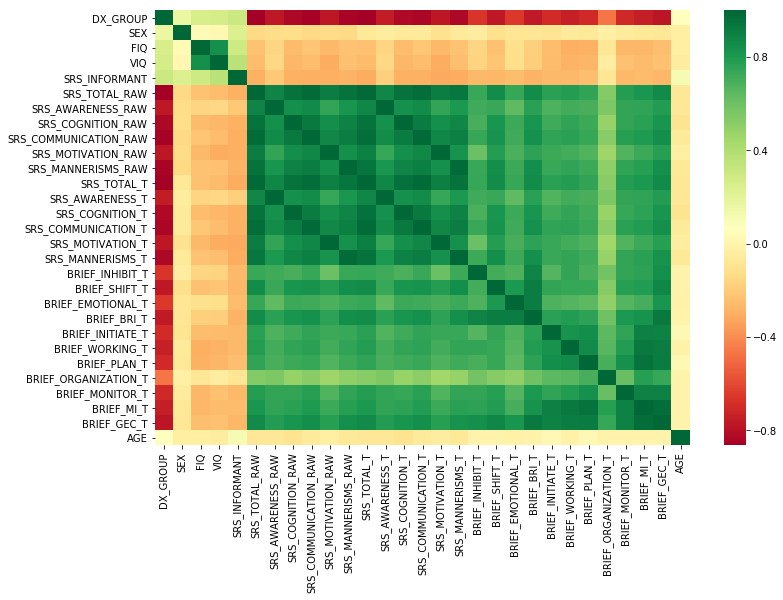

In [163]:
plt.figure(figsize = (12, 8))
sns.heatmap(ASD_df1.corr(), annot = False, cmap="RdYlGn")
plt.yticks(rotation=0) 

plt.show()

All the features are well correlated with the target. I can see that some features are also in twice in a RAW and a T form. I am gonne keep both because classifications models do not suffer from collinearity, PCA reduction will select the most relevant ones. 

In [164]:
ASD_df1.to_csv('ASD_df1.csv', index=False, encoding='utf-8')

---

## Lets create the second dataset with the SRS and RBSR tests

In [165]:
# Preprocess steps that we already used before

abide2 = pd.read_csv('ABIDEII_Composite_Phenotypic.csv', encoding = 'unicode_escape')

na_80 = abide2.isnull().sum()/ len(abide2)

# taking all columns with more than 80% of missing data 
missing_data = na_80[na_80 > 0.70].index

abide2.drop(missing_data, axis=1, inplace=True)

## Small mistake here in the dataset, the Age at scan has a space after it, I am gonne rename it

abide2['AGE'] = abide2['AGE_AT_SCAN ']
abide2.drop('AGE_AT_SCAN ', axis=1, inplace=True)

In [166]:
abide2.isnull().sum().sort_values();

In [167]:
abide2_df2 = abide2.dropna(subset=['SRS_MANNERISMS_T', 'SRS_COGNITION_T', 'SRS_AWARENESS_T', 'RBSR_6SUBSCALE_SAMENESS', 'RBSR_6SUBSCALE_COMPULSIVE']).copy()
abide2_df2.shape

(358, 73)

In [168]:
abide2_df2.isnull().sum().sort_values();

In [169]:
# Drop all other columns with NA values

abide2_df2.dropna(axis=1, inplace=True)
abide2_df2.shape

(358, 32)

In [170]:
abide2_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 1 to 1020
Data columns (total 32 columns):
SITE_ID                          358 non-null object
SUB_ID                           358 non-null int64
DX_GROUP                         358 non-null int64
SEX                              358 non-null int64
FIQ                              358 non-null float64
FIQ_TEST_TYPE                    358 non-null object
SRS_EDITION                      358 non-null float64
SRS_VERSION                      358 non-null float64
SRS_INFORMANT                    358 non-null float64
SRS_TOTAL_RAW                    358 non-null float64
SRS_AWARENESS_RAW                358 non-null float64
SRS_COGNITION_RAW                358 non-null float64
SRS_COMMUNICATION_RAW            358 non-null float64
SRS_MOTIVATION_RAW               358 non-null float64
SRS_MANNERISMS_RAW               358 non-null float64
SRS_TOTAL_T                      358 non-null float64
SRS_AWARENESS_T                  358 n

In [171]:
# Drop useless columns

drop = ['SITE_ID', 'SUB_ID', 'EYE_STATUS_AT_SCAN', 'CURRENT_MEDICATION_NAME', 'CURRENT_MED_STATUS', 'SRS_EDITION', 'SRS_VERSION', 'FIQ_TEST_TYPE']

abide2_df2.drop(drop, axis=1, inplace=True)

In [172]:
abide2_df2.shape

(358, 24)

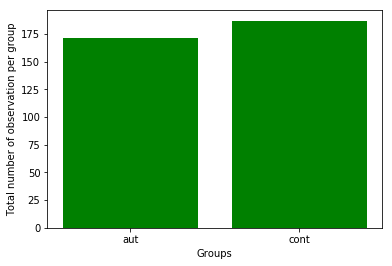

Number of control in the dataset: 187
Number of asd in the dataset: 171
Total of participants in the dataset: 358
Ratio of ASD children in the dataset: 47.77


In [173]:
groups = ['ASD', 'CONTROL']
height = [(abide2_df2['DX_GROUP']==1).sum(), (abide2_df2['DX_GROUP']==2).sum()]

plt.bar(groups, height, color='g')


plt.xticks([0,1], ['aut', 'cont'])
plt.xlabel('Groups')
plt.ylabel('Total number of observation per group')

plt.show()

n_asd = (abide2_df2['DX_GROUP']==1).sum()
n_c = (abide2_df2['DX_GROUP']==2).sum()

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)
print('Ratio of ASD children in the dataset: {:.2f}'.format(n_asd/(n_c + n_asd)*100))

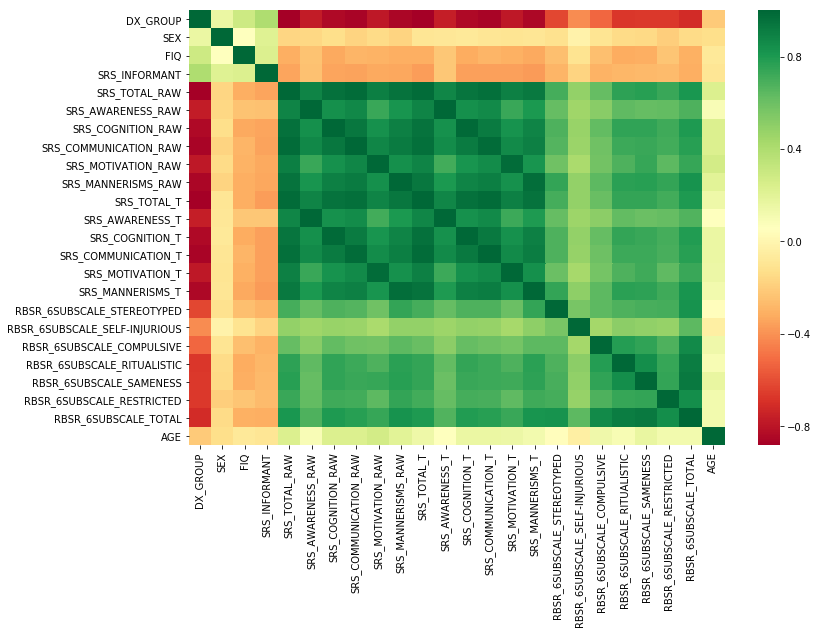

In [174]:
plt.figure(figsize = (12, 8))
sns.heatmap(abide2_df2.corr(), annot = False, cmap="RdYlGn")
plt.yticks(rotation=0) 

plt.show()

All the features are well correlated with the target. I can see that some features are also in twice in a RAW and a T form. I am gonne keep both because classifications models do not suffer from collinearity, PCA reduction will select the most relevant ones. 

In [175]:
abide2_df2.to_csv('ASD_df2.csv', index=False, encoding='utf-8')

---

## Finally I will try to create a dataset with only the SRS to maximize the number of rows

In [176]:
# Preprocess steps that we already used before

abide2 = pd.read_csv('ABIDEII_Composite_Phenotypic.csv', encoding = 'unicode_escape')

na_80 = abide2.isnull().sum()/ len(abide2)

# taking all columns with more than 80% of missing data 
missing_data = na_80[na_80 > 0.70].index

abide2.drop(missing_data, axis=1, inplace=True)

## Small mistake here in the dataset, the Age at scan has a space after it, I am gonne rename it

abide2['AGE'] = abide2['AGE_AT_SCAN ']
abide2.drop('AGE_AT_SCAN ', axis=1, inplace=True)

In [177]:
abide2.shape

(1114, 73)

In [178]:
abide2.isnull().sum().sort_values();

In [179]:
SRS = [x for x in abide2.columns if 'SRS' in x]

abide2_SRS = abide2.dropna(subset=SRS).copy()
abide2_SRS.shape

(728, 73)

In [180]:
# Drop the rest
abide2_SRS.dropna(axis=1, inplace=True)
abide2_SRS.shape

(728, 20)

In [181]:
abide2_SRS.isnull().sum().sort_values()

SITE_ID                  0
SRS_MOTIVATION_T         0
SRS_COMMUNICATION_T      0
SRS_COGNITION_T          0
SRS_AWARENESS_T          0
SRS_TOTAL_T              0
SRS_MANNERISMS_RAW       0
SRS_MOTIVATION_RAW       0
SRS_COMMUNICATION_RAW    0
SRS_COGNITION_RAW        0
SRS_AWARENESS_RAW        0
SRS_TOTAL_RAW            0
SRS_INFORMANT            0
SRS_VERSION              0
SRS_EDITION              0
SEX                      0
DX_GROUP                 0
SUB_ID                   0
SRS_MANNERISMS_T         0
AGE                      0
dtype: int64

In [182]:
# Drop useless columns

drop = ['SITE_ID', 'SUB_ID', 'SRS_EDITION', 'SRS_VERSION']

abide2_SRS.drop(drop, axis=1, inplace=True)

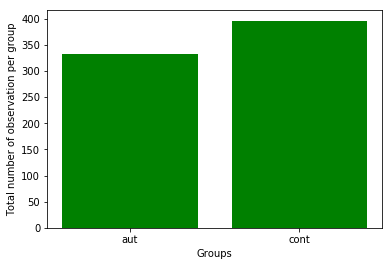

Number of control in the dataset: 396
Number of asd in the dataset: 332
Total of participants in the dataset: 728
Ratio of ASD children in the dataset: 45.60


In [183]:
groups = ['ASD', 'CONTROL']
height = [(abide2_SRS['DX_GROUP']==1).sum(), (abide2_SRS['DX_GROUP']==2).sum()]

plt.bar(groups, height, color='g')


plt.xticks([0,1], ['aut', 'cont'])
plt.xlabel('Groups')
plt.ylabel('Total number of observation per group')

plt.show()

n_asd = (abide2_SRS['DX_GROUP']==1).sum()
n_c = (abide2_SRS['DX_GROUP']==2).sum()

print('Number of control in the dataset:', n_c)
print('Number of asd in the dataset:', n_asd)
print('Total of participants in the dataset:', n_c + n_asd)
print('Ratio of ASD children in the dataset: {:.2f}'.format(n_asd/(n_c + n_asd)*100))

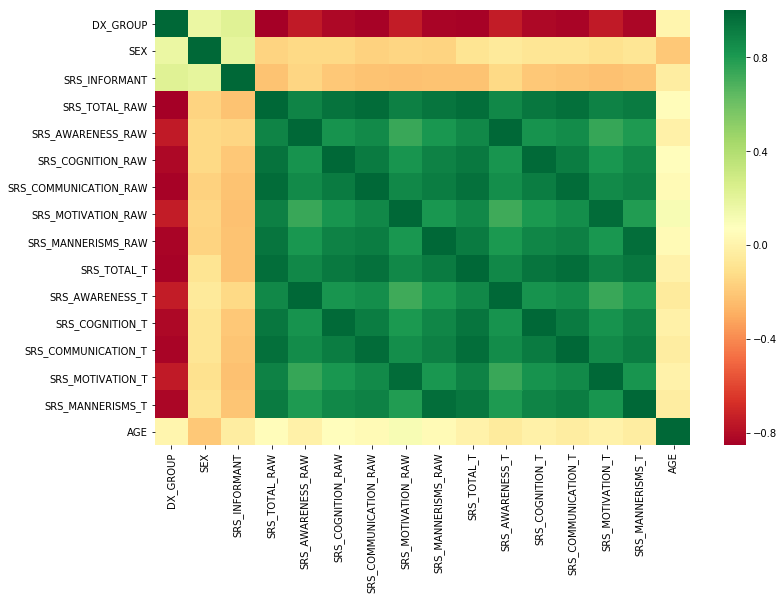

In [184]:
plt.figure(figsize = (12, 8))
sns.heatmap(abide2_SRS.corr(), annot = False, cmap="RdYlGn")
plt.yticks(rotation=0) 

plt.show()

All the features are well correlated with the target. I can see that some features are also in twice in a RAW and a T form. I am gonne keep both because classifications models do not suffer from collinearity, PCA reduction will select the most relevant ones. 

In [185]:
abide2_SRS.to_csv('ASD_SRS_only.csv', index=False, encoding='utf-8')